## Pandas Cookbook


* [Pandas cookbook](https://github.com/jvns/pandas-cookbook/tree/master/cookbook)

* [Pandas Cookbook by Packt](https://github.com/PacktPublishing/Pandas-Cookbook)

* [Mastering Pandas](https://github.com/femibyte/mastering_pandas)


this notebook is based on http://wavedatalab.github.io/datawithpython/index.html using weather_2012.csv


In [1]:
%matplotlib
import numpy as np
import pandas as pd

Using matplotlib backend: Qt5Agg


In [2]:
# https://github.com/jvns/pandas-cookbook/blob/master/data/weather_2012.csv
file_data_csv = "./pandas-cookbook/data/weather_2012.csv.gz"

In [3]:
df = pd.read_csv(file_data_csv)

In [4]:
df.head()   # look at first few rows

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df.shape    # dataframe shape: nrow x ncol

(8784, 8)

In [7]:
df.columns  # column name

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [8]:
# get data types
df.dtypes

Date/Time              object
Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object

In [9]:
[type(c) for c in df.iloc[0,:]]

[str,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 numpy.float64,
 numpy.float64,
 str]

In [10]:
for c_name, c_type in zip(df.columns, [type(c) for c in df.iloc[0,:]]):
    print(c_name," => ", c_type)

Date/Time  =>  <class 'str'>
Temp (C)  =>  <class 'numpy.float64'>
Dew Point Temp (C)  =>  <class 'numpy.float64'>
Rel Hum (%)  =>  <class 'numpy.int64'>
Wind Spd (km/h)  =>  <class 'numpy.int64'>
Visibility (km)  =>  <class 'numpy.float64'>
Stn Press (kPa)  =>  <class 'numpy.float64'>
Weather  =>  <class 'str'>


In [11]:
list(zip(df.columns, [type(c) for c in df.iloc[0,:]]))

[('Date/Time', str),
 ('Temp (C)', numpy.float64),
 ('Dew Point Temp (C)', numpy.float64),
 ('Rel Hum (%)', numpy.int64),
 ('Wind Spd (km/h)', numpy.int64),
 ('Visibility (km)', numpy.float64),
 ('Stn Press (kPa)', numpy.float64),
 ('Weather', str)]

In [12]:
# get summary stats
df.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [13]:
# get data rows for a given column
df['Date/Time'][100:105]

100    2012-01-05 04:00:00
101    2012-01-05 05:00:00
102    2012-01-05 06:00:00
103    2012-01-05 07:00:00
104    2012-01-05 08:00:00
Name: Date/Time, dtype: object

In [14]:
# slice data
df.iloc[0:2]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [15]:
df.iloc[0:5, 0:3]

,Date/Time,Temp (C),Dew Point Temp (C)
0,2012-01-01 00:00:00,-1.8,-3.9
1,2012-01-01 01:00:00,-1.8,-3.7
2,2012-01-01 02:00:00,-1.8,-3.4
3,2012-01-01 03:00:00,-1.5,-3.2
4,2012-01-01 04:00:00,-1.5,-3.3


In [16]:
df[['Date/Time', 'Weather']].iloc[10:15]

,Date/Time,Weather
10,2012-01-01 10:00:00,Fog
11,2012-01-01 11:00:00,Fog
12,2012-01-01 12:00:00,Fog
13,2012-01-01 13:00:00,Fog
14,2012-01-01 14:00:00,Fog


In [17]:
# filter
df[df['Weather'] == 'Drizzle,Fog'][:10]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
548,2012-01-23 20:00:00,2.9,1.2,89,26,9.7,100.32,"Drizzle,Fog"
635,2012-01-27 11:00:00,0.7,-1.0,88,20,2.4,99.08,"Drizzle,Fog"
636,2012-01-27 12:00:00,0.7,-0.9,89,20,2.8,98.91,"Drizzle,Fog"
637,2012-01-27 13:00:00,0.7,-1.0,88,22,3.2,98.76,"Drizzle,Fog"
638,2012-01-27 14:00:00,0.5,-1.3,88,20,2.4,98.69,"Drizzle,Fog"
639,2012-01-27 15:00:00,0.3,-1.6,87,19,2.4,98.65,"Drizzle,Fog"
1738,2012-03-13 10:00:00,3.5,1.5,87,11,2.4,100.54,"Drizzle,Fog"
1739,2012-03-13 11:00:00,3.5,1.6,87,11,4.8,100.57,"Drizzle,Fog"
1747,2012-03-13 19:00:00,3.1,0.9,85,17,6.4,100.79,"Drizzle,Fog"
1766,2012-03-14 14:00:00,2.2,1.8,97,7,8.0,101.70,"Drizzle,Fog"


In [18]:
df_sub = df[(df['Temp (C)'] > 0) & (df['Temp (C)'] < 20) & (df['Wind Spd (km/h)'] < 10)]
df_sub.head(10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
540,2012-01-23 12:00:00,2.3,-2.4,71,6,48.3,101.33,Cloudy
554,2012-01-24 02:00:00,3.1,2.1,93,9,9.7,100.09,Rain
661,2012-01-28 13:00:00,0.9,-3.5,72,4,48.3,100.58,Cloudy
662,2012-01-28 14:00:00,1.2,-3.5,71,9,48.3,100.48,Cloudy
666,2012-01-28 18:00:00,1.6,-3.4,69,9,25.0,100.08,Cloudy
1070,2012-02-14 14:00:00,0.1,-5.1,68,9,24.1,100.98,Mostly Cloudy
1071,2012-02-14 15:00:00,1.1,-5.3,62,9,24.1,100.98,Mostly Cloudy
1072,2012-02-14 16:00:00,2.3,-4.9,59,7,24.1,100.97,Mostly Cloudy
1073,2012-02-14 17:00:00,1.1,-3.7,70,9,24.1,101.01,Mostly Cloudy
1074,2012-02-14 18:00:00,1.3,-3.9,68,9,25.0,101.08,Cloudy


In [19]:
# groupby
df2 = df.groupby(['Weather']).count()

In [20]:
df2['Date/Time']

Weather
Clear                                      1326
Cloudy                                     1728
Drizzle                                      41
Drizzle,Fog                                  80
Drizzle,Ice Pellets,Fog                       1
Drizzle,Snow                                  2
Drizzle,Snow,Fog                             15
Fog                                         150
Freezing Drizzle                              7
Freezing Drizzle,Fog                          6
Freezing Drizzle,Haze                         3
Freezing Drizzle,Snow                        11
Freezing Fog                                  4
Freezing Rain                                14
Freezing Rain,Fog                             4
Freezing Rain,Haze                            2
Freezing Rain,Ice Pellets,Fog                 1
Freezing Rain,Snow Grains                     1
Haze                                         16
Mainly Clear                               2106
Moderate Rain,Fog               

In [21]:
df3 = df[df['Rel Hum (%)'] < 20].groupby(['Weather', 'Rel Hum (%)']).mean()

df3

Temp (C)  Dew Point Temp (C)  Wind Spd (km/h)  \
Weather       Rel Hum (%)                                                  
Cloudy        18               15.5                -9.0               22   
Mostly Cloudy 18               20.7                -4.4               13   
              19               16.6                -6.8               15   

                           Visibility (km)  Stn Press (kPa)  
Weather       Rel Hum (%)                                    
Cloudy        18                      48.3           101.60  
Mostly Cloudy 18                      48.3           101.00  
              19                      48.3           101.66

In [22]:
df3 = df[df['Rel Hum (%)'] < 20].groupby(['Weather', 'Rel Hum (%)']).aggregate(np.mean)

df3

Temp (C)  Dew Point Temp (C)  Wind Spd (km/h)  \
Weather       Rel Hum (%)                                                  
Cloudy        18               15.5                -9.0               22   
Mostly Cloudy 18               20.7                -4.4               13   
              19               16.6                -6.8               15   

                           Visibility (km)  Stn Press (kPa)  
Weather       Rel Hum (%)                                    
Cloudy        18                      48.3           101.60  
Mostly Cloudy 18                      48.3           101.00  
              19                      48.3           101.66

In [23]:
df4 = df[df['Rel Hum (%)'] < 20].groupby(['Weather', 'Rel Hum (%)']).aggregate(np.sum)

df4

Temp (C)  Dew Point Temp (C)  Wind Spd (km/h)  \
Weather       Rel Hum (%)                                                  
Cloudy        18               15.5                -9.0               22   
Mostly Cloudy 18               20.7                -4.4               13   
              19               16.6                -6.8               15   

                           Visibility (km)  Stn Press (kPa)  
Weather       Rel Hum (%)                                    
Cloudy        18                      48.3           101.60  
Mostly Cloudy 18                      48.3           101.00  
              19                      48.3           101.66

In [24]:
# top 10 distinct value counts
pd.value_counts(df['Weather'])[:10]

Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: Weather, dtype: int64

In [25]:
# get unique values of a column
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [26]:
# map
# df_rain = df['Weather'].map(lambda x: x.startswith('T'))
df_rain = df['Weather'].map(lambda x: 'Rain' in x)

In [27]:
df[df_rain]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
18,2012-01-01 18:00:00,3.8,1.0,82,15,12.9,99.74,Rain
19,2012-01-01 19:00:00,3.1,1.3,88,15,12.9,99.68,Rain
22,2012-01-01 22:00:00,4.4,1.9,84,24,19.3,99.32,Rain Showers
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
153,2012-01-07 09:00:00,-6.1,-8.7,82,7,9.7,100.15,"Freezing Rain,Fog"
154,2012-01-07 10:00:00,-5.7,-8.0,84,7,8.0,100.13,Freezing Rain
157,2012-01-07 13:00:00,-4.8,-7.2,83,15,9.7,100.07,Freezing Rain
221,2012-01-10 05:00:00,0.8,-1.2,86,30,9.7,100.02,"Rain,Snow"
296,2012-01-13 08:00:00,-5.1,-7.5,83,26,8.0,98.69,Freezing Rain
297,2012-01-13 09:00:00,-5.0,-7.3,84,32,4.8,98.56,"Freezing Rain,Snow Grains"


### visualization

In [35]:
%matplotlib inline

In [28]:
df_weather = pd.value_counts(df['Weather'])[:10]

In [29]:
df_weather

Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: Weather, dtype: int64

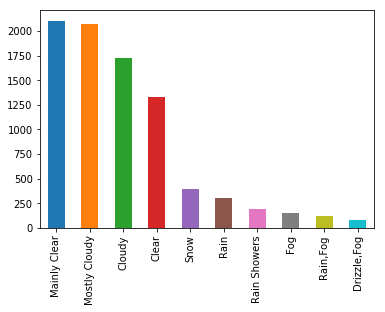

In [36]:
df_weather.plot(kind='bar')

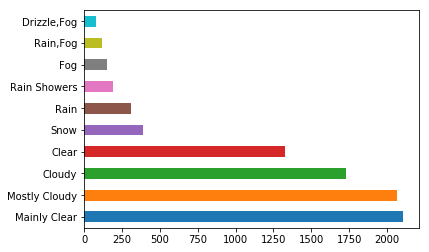

In [37]:
df_weather.plot(kind='barh')